<a href="https://colab.research.google.com/github/Tbijo/Fabry_NS2021/blob/master/KerasZoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import kniznic
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras
import itertools # pre confusion matrix

In [2]:
# nacitanie a prva vizualizacia dat
data = pd.read_csv('zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


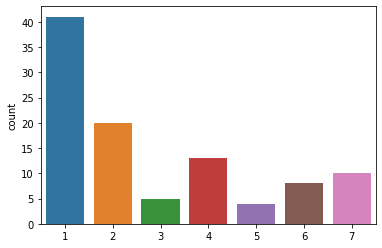

In [4]:
# podla stlpca class_type sa budu robit predikcie 
sns.countplot(data.iloc[:, -1:].values.flatten())
# vidime ze mame 7 roznych kategorii

In [5]:
# priprava dat na rozdelenie do testovacich a trenovacich mnozin
X = data.iloc[:, 1:-1].values # vyberieme vsetky stlpce okrem posledneho
Y = data.class_type.values # vyberieme posledny stlpec lebo ten urcuje kategorie
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [6]:
# kategorizacia
# na kategorizovanie pouzijeme OneHotEncoder
#   pouziva sa ak sa pracuje s viacerymi kategoriami, 
#   na vstup ale potrebuje 2 dimensionalne pole to nam riesi funkcia reshape()
#   automaticky odstranuje niektore nepotrebne udaje v tomto pripade stlpec s cislovanim riadkov
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.reshape(-1,1)).toarray()
Y
# mame maticu ktorej stlpce predstavuju kategorie zvierat
# 1 znamena ze zviera patri do tej kategorie

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

In [7]:
# rozdelenie dat na trenovacie a testovacie mnoziny
# X - klasifikovat podla stlpca text
# Y - na urcenie kategorie
# test_size pomer ako sa to ma rozdelit 80:20 train:test (0.2)
# random_state nahodne rozdeli ale si to zapamata, bude generovat nahodne cisla
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

In [8]:
# vytvorenie modelu
model = Sequential() 

# pridavanie skrytych vrstiev s nejakym poctom neuronov a aktivacnymi funkciami

# prva skryta vrstva s 20 neuronmi 
#   input_dim pocet dimenzii (vrstiev) kolko vstupov ma ocakavat specifikuje sa len pre prvu skrytu vrstvu
#   atkivacna funkcia relu
model.add(Dense(units = 20, activation = 'relu', input_dim = 16))
# Druha skryta vrstva s 10 neuronmi 
#   aktivacna funkcia relu
model.add(Dense(units = 10, activation = 'relu'))

# dali sme len dve skryte vrstvy pretoze narocnost datasetu si to nevyzaduje
# pouzili sme funkciu relu pretoze je menej nachylna na miznutie prechodov co zabranuje hlbkovemu uceniu a je vhodna ak sme normalizovali data na (0-1)

# Vystupna vrstva so 7 neuronmi lebo ocakavame 7 vystupov (pocet klasifikacii) / lebo kategoricka premenna ma 7 hodnot (7 klasifikacii)
#   aktivacna funkcia sigmoid pouzili sme ju preto lebo je najvhodnejsia pre klasifikovanie
model.add(Dense(units = 7, activation = 'sigmoid'))

# model je pripraveny treba ho skompilovat a potom natrenovat

# sumarizacia modelu ktory sme vytvorili
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                340       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 627
Trainable params: 627
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compilacia modelu
# pred trenovanim ho treba skompilovat - priprava na trenovanie
# param strata - loss napr. metoda najmensich stvorcov alebo sparse_categorical_crossentropy
# optimizer - na zaklade coho sa ma optimalizovat 
# metrics - pridanie presnosti k vysledku, podla coho budeme sudit nas model (accuracy podla presnosti)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [10]:
# x_train - vstupne data / vzorky (numpy array)
# y_train - labels for corresponding vzorky target data (numpy array)
# batch_size - kolko samplov/vstupnych dat sa spracuje v sieti naraz
# epochs - model sa bude trenovat na vsetkych datach (epochs = 40) v tomto pripade 40-krat pred skoncenim trenovania
# shufle - je vzdy true aby sa model neucil podla poradia udajov v datasete
# verbose - aby sme videli output zakazdym ked zbehne fit funkcia (0,1,2) cim vyssie cislo tym podrobnejsi output
# validating score with validation_data
trenovanieSiete = model.fit(x_train, y_train, epochs=40, batch_size=8, validation_data=(x_test, y_test), verbose=2)
# uvidime loss a accuracy pre trenovacie mnoziny a aj los a accuracy pre validacne/testovacie mnoziny
# loss by sa mala zmensovat
# accuracy zvacsovat

Epoch 1/40
10/10 - 1s - loss: 2.1746 - accuracy: 0.1125 - val_loss: 2.0441 - val_accuracy: 0.0476
Epoch 2/40
10/10 - 0s - loss: 2.0388 - accuracy: 0.0875 - val_loss: 1.9661 - val_accuracy: 0.0476
Epoch 3/40
10/10 - 0s - loss: 1.9166 - accuracy: 0.1125 - val_loss: 1.8923 - val_accuracy: 0.1905
Epoch 4/40
10/10 - 0s - loss: 1.8190 - accuracy: 0.4125 - val_loss: 1.8224 - val_accuracy: 0.3333
Epoch 5/40
10/10 - 0s - loss: 1.7248 - accuracy: 0.4875 - val_loss: 1.7512 - val_accuracy: 0.3333
Epoch 6/40
10/10 - 0s - loss: 1.6389 - accuracy: 0.4375 - val_loss: 1.6878 - val_accuracy: 0.3333
Epoch 7/40
10/10 - 0s - loss: 1.5594 - accuracy: 0.4250 - val_loss: 1.6290 - val_accuracy: 0.3333
Epoch 8/40
10/10 - 0s - loss: 1.4969 - accuracy: 0.4250 - val_loss: 1.5774 - val_accuracy: 0.3333
Epoch 9/40
10/10 - 0s - loss: 1.4391 - accuracy: 0.4250 - val_loss: 1.5337 - val_accuracy: 0.3333
Epoch 10/40
10/10 - 0s - loss: 1.3947 - accuracy: 0.4250 - val_loss: 1.4932 - val_accuracy: 0.3333
Epoch 11/40
10/10 -

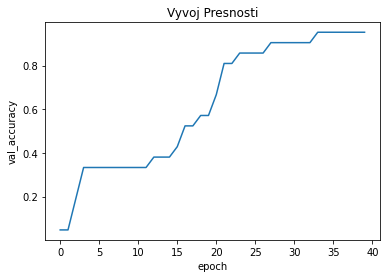

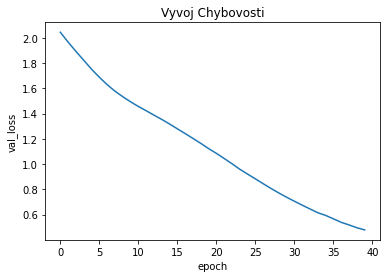

In [11]:
# graf pre klesanie loss a rastie accuracy

plt.plot(trenovanieSiete.history['val_accuracy'])
plt.title('Vyvoj Presnosti')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(trenovanieSiete.history['val_loss'])
plt.title('Vyvoj Chybovosti')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

In [12]:
# vypis evaluacie sieti
print("\nPresnost: %.2f%%" % (model.evaluate(x_test, y_test)[1]*100))

1/1 [==============================] - 0s 17ms/step - loss: 0.4783 - accuracy: 0.9524

Presnost: 95.24%


In [13]:
y_pred_con = model.predict(x_test)
y_pred_con

array([[0.59626806, 0.27722934, 0.6941601 , 0.46255195, 0.35553998,
        0.20787185, 0.6920458 ],
       [0.6046509 , 0.0197179 , 0.52813536, 0.8587181 , 0.45973322,
        0.27829084, 0.31212926],
       [0.5568263 , 0.0226264 , 0.38245943, 0.8678668 , 0.40460548,
        0.45393768, 0.28239864],
       [0.9870196 , 0.39896777, 0.337234  , 0.07089457, 0.30886585,
        0.01543969, 0.20715567],
       [0.9868432 , 0.21766636, 0.32504666, 0.12326702, 0.4083435 ,
        0.01512483, 0.16506013],
       [0.97543025, 0.33433655, 0.37478584, 0.12165412, 0.3180501 ,
        0.02761397, 0.24174687],
       [0.5310495 , 0.95526874, 0.47123104, 0.24146515, 0.15244567,
        0.55933905, 0.22074917],
       [0.5575123 , 0.02159458, 0.33540288, 0.87456286, 0.3916092 ,
        0.50223225, 0.2576959 ],
       [0.9778769 , 0.3080148 , 0.47159392, 0.10983112, 0.32226014,
        0.01874498, 0.33216906],
       [0.98589885, 0.4963569 , 0.44385603, 0.06343797, 0.3963138 ,
        0.01019451, 0.2

In [14]:
# PREDIKCIA
# x_test su data podla ktorych chceme aby nas model predikoval
y_pred_con = model.predict(x_test)
# vrati nam maticu percentualnych hodnot, z kazdeho riadku vyberieme index stlpca s najvacsou hodnotou
#   index stlpca bude prisluchat k jeho kategorii

y_predik, y_real = [], []

# argmax vrati index najvacsej hodnoty v poly
# pouzijeme ho aby sme videli najpravdepodobnejsie predikcie

# rovnako pri predikovanych datach aj realnych datach akurat z nich budeme vracat indexi nie kde sa nachadza najvacsia percentualna hodnota ale hodnota 1
for i in y_test:
    y_real.append(np.argmax(i)) 
for j in y_pred_con:
    y_predik.append(np.argmax(j))
    
# potom hodnoty vlozime do dataframe-u aby sme videli porovnat uspesnost
df = pd.DataFrame()
df['Predik_Kategoria'] = y_predik
df['Realna_Kategoria'] = y_real
# zvacsit kazdu
df

,Predik_Kategoria,Realna_Kategoria
0,2,4
1,3,3
2,3,3
3,0,0
4,0,0
5,0,0
6,1,1
7,3,3
8,0,0
9,0,0


In [15]:
# zmätková matica
# presnejsie zobrazenie nam ukaze zmätková matica
confusion_matrix(y_pred = y_predik, y_true = y_real)

array([[7, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2]])

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# zdroj: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

Confusion matrix, without normalization
[[7 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


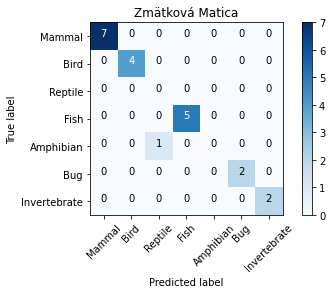

In [18]:
#ukaze nam ako spravne predikoval nas model na testovacich datach
cm = confusion_matrix(y_pred = y_predik, y_true = y_real)
# vytvorenie matice graficky
cm_plot_labels = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Zmätková Matica')
# uvidime graf kde budu spravne kategorizovane (pocty ci to je zviera a ci to nieje zviera) a predikovane kategorizovanie (pocty ci to je zviera a ci to nieje zviera)
# porovnanie kolke kategorizoval spravne a kolke nekategorizoval spravne?